In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import json
from scipy.spatial.transform import Rotation as R

In [2]:
with open('./solo_1/sequence.0/step0.frame_data.json') as json_file:
    data = json.load(json_file)

In [19]:
captures = data['captures']
def get_location(captures):
    # coeff = np.array([-0.00389254, 0.49512566, 0.13212298])

    def _find(l, s):
        for elem in l:
            if elem['id'] == s or elem['id'] == f'{s}_0':
                return elem['values'][0]
    
    def _get_bbox(view):
        '''
            For each view, extract the 2D bounding box and
        '''
        bbox_3d, bbox_2d = _find(view['annotations'], 'bounding box 3D'), _find(view['annotations'], 'bounding box')
        
        # refine 3D location of the object
        euler = R.from_quat(bbox_3d.get('rotation')).as_matrix()
        obj_location = view.get('position') + np.dot(bbox_3d['translation'], euler)  # - bbox_3d['size']*np.array([-0.00389254, 0.49512566, 0.13212298])

        # pre-process 2D bbox
        bbox = {
            'center': np.array(bbox_2d['origin']) + np.array(bbox_2d['dimension'])/2,
            'size': np.array(bbox_2d['dimension'])/2,
        }

        return obj_location, bbox

    bboxes, cameras = [], []
    for view in captures:  # per view
        obj_location, bbox_2d = _get_bbox(view)

        bboxes.append(bbox_2d)
        cameras.append({
            'filename': view['filename'],
            'position': view['position'],
            'rotation': view['rotation'],
        })

    return {
        '3D_location': obj_location,
        'bboxes': bboxes,
        'cameras': cameras,
    }

output = get_location(captures)

{'3D_location': array([-2.00286907,  1.11557279, -2.92380769]), 'bboxes': [{'center': array([1884.,  734.]), 'size': array([ 47., 176.])}, {'center': array([2306. ,  811.5]), 'size': array([106. , 262.5])}], 'cameras': [{'filename': 'step0.camera_0.png', 'position': [8.0, 2.5, 3.0]}, {'filename': 'step0.camera.png', 'position': [-7.0, 2.5, 3.0]}]}


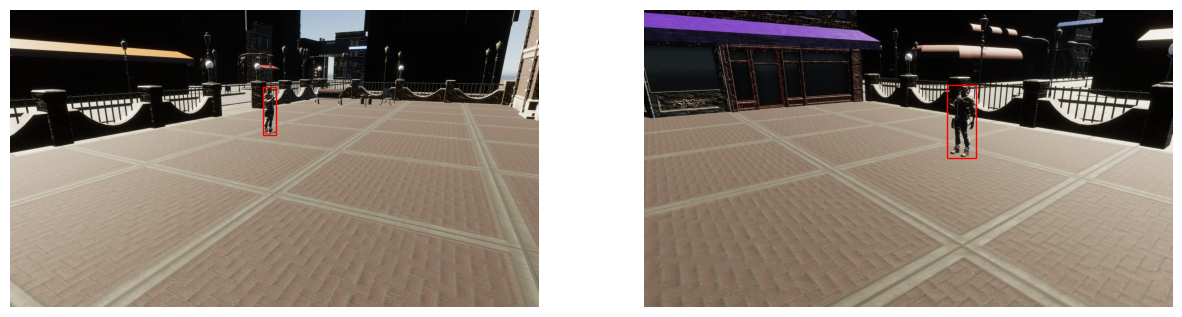

In [26]:
n_view = len(output['bboxes'])
fig, ax = plt.subplots(1, 2, figsize=(15, 15*n_view))
for i in range(n_view):
    bbox, camera = output.get('bboxes')[i], output.get('cameras')[i]
    ax[i].imshow(mpimg.imread(f'./solo_1/sequence.0/{camera["filename"]}'))
    ax[i].add_patch(
        patches.Rectangle(
            bbox['center'] - np.array([bbox['size'][0], bbox['size'][1]]),
            2*bbox['size'][0], 2*bbox['size'][1],
            linewidth=1, edgecolor='r', facecolor='none'
        )
    )
    ax[i].axis('off')

plt.show()

In [ ]:
obj_1

In [ ]:
obj_2_3d

In [ ]:
camera = np.array([8.0, 2.5, 3.0])
camera_0 = np.array([-7.0, 2.5, 3.0])

euler = R.from_quat(obj_1_3d['rotation']).as_matrix()
euler_1 = R.from_quat(obj_2_3d['rotation']).as_matrix()

print('-'*30)
print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array([0, .5, 0]))
# print(camera_0 + np.dot(obj_2_3d['translation'], euler_1) - obj_1_3d['size']*np.array([0, .5, 0]))

# print('-'*30)
# print(np.dot(obj_1_3d['translation']+camera, euler))
# print(np.dot(obj_2_3d['translation']+camera_0, euler_1))


In [ ]:
euler = R.from_quat(obj_1_3d['rotation']).as_euler('xyz', degrees=True)
euler_1 = R.from_quat(obj_2_3d['rotation']).as_euler('xyz', degrees=True)

print(euler, euler_1)

In [ ]:
Y_true = np.array([1, 0.2, -2])
coeff = (camera + np.dot(obj_1_3d['translation'], euler) - Y_true)/obj_1_3d['size']
print(coeff)

print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array(coeff))
print(camera + np.dot(obj_1_3d['translation'], euler) - obj_1_3d['size']*np.array([0, .5, 0]))